# Apache Hudi MultiTable Streamer with Postgres Debezium and Kafka Bulding Near Real time lakehouse

# Sync Command 
```
spark-submit \
    --class  org.apache.hudi.utilities.deltastreamer.HoodieMultiTableDeltaStreamer \
    --packages 'org.apache.hudi:hudi-spark3.4-bundle_2.12:0.14.0,org.apache.hadoop:hadoop-aws:3.3.2' \
    --properties-file /Users/soumilshah/IdeaProjects/lakehouse-streamer/universal-datalakehouse-postgres-ingestion-deltastreamer/streamer/spark-config.properties \
    --master 'local[*]' \
    --executor-memory 1g \
    /Users/soumilshah/IdeaProjects/lakehouse-streamer/universal-datalakehouse-postgres-ingestion-deltastreamer/jar/hudi-utilities-slim-bundle_2.12-0.14.0.jar \
    --op UPSERT \
    --enable-hive-sync \
    --table-type COPY_ON_WRITE \
    --source-ordering-field _event_origin_ts_ms \
    --source-class org.apache.hudi.utilities.sources.debezium.PostgresDebeziumSource \
    --payload-class org.apache.hudi.common.model.debezium.PostgresDebeziumAvroPayload \
    --base-path-prefix s3a://warehouse/tmp3 \
    --target-table customers,orders \
    --config-folder /Users/soumilshah/IdeaProjects/lakehouse-streamer/universal-datalakehouse-postgres-ingestion-deltastreamer/streamer/configfolder/ \
    --props /Users/soumilshah/IdeaProjects/lakehouse-streamer/universal-datalakehouse-postgres-ingestion-deltastreamer/streamer/configfolder/source.properties
```

# Query the Hudi tables

# Install Trino python packages
```
pip install trino
pip install ipython-sql

```

# Read data as HUDI 

In [1]:
%load_ext sql
%sql trino://admin@localhost:8080/default
%sql SHOW CATALOGS
%sql USE hudi.default
%sql show tables

 * trino://admin@localhost:8080/default
Done.
 * trino://admin@localhost:8080/default
Done.
 * trino://admin@localhost:8080/default
Done.


Table
customer
orders


In [2]:
%sql SELECT customer_id,email FROM customer 

 * trino://admin@localhost:8080/default
Done.


customer_id,email
512f8b17-2d60-4ad8-8c94-7ecb38d03e51,liam.johnson@example.com
9c4eeb2a-1d04-4579-9f14-b13b703e9d9a,ella.collins@example.com
bb559489-b346-46b2-a15b-5b7d4ddc78c4,travis61@example.org
1298fe7d-6586-4554-8f36-3db482ba94a5,sharon99@example.com


In [3]:
%sql SELECT order_id,priority,customer_id FROM orders 

 * trino://admin@localhost:8080/default
Done.


order_id,priority,customer_id
79e3edc5-dcbc-4604-900e-d6a7af925f12,LOW,1298fe7d-6586-4554-8f36-3db482ba94a5
6c4ae4e5-fc73-44d6-b85e-512ac073c4c7,MEDIUM,1298fe7d-6586-4554-8f36-3db482ba94a5
f11e2db1-a0b4-4c21-b31d-e62066a11f33,HIGH,512f8b17-2d60-4ad8-8c94-7ecb38d03e51
1e6f81e2-f1b4-464b-9af6-8cbd1bd08c1a,HIGH,bb559489-b346-46b2-a15b-5b7d4ddc78c4
d304f7cb-6fa8-45b6-a6cb-3d3eb1b1f66f,MEDIUM,9c4eeb2a-1d04-4579-9f14-b13b703e9d9a
a459d9e4-7e95-4c71-98af-bdd23bf67f31,LOW,512f8b17-2d60-4ad8-8c94-7ecb38d03e51
e8939a8f-1476-4b46-bf24-fd33e3af9832,HIGH,bb559489-b346-46b2-a15b-5b7d4ddc78c4
33c0d6d8-d7d3-4f6c-9172-8328b13dc7df,HIGH,9c4eeb2a-1d04-4579-9f14-b13b703e9d9a


# Update the Record on Postgres

# 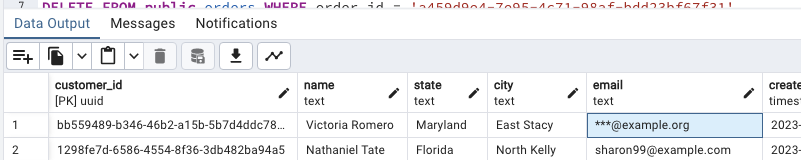

# Sync Command 
```
spark-submit \
    --class  org.apache.hudi.utilities.deltastreamer.HoodieMultiTableDeltaStreamer \
    --packages 'org.apache.hudi:hudi-spark3.4-bundle_2.12:0.14.0,org.apache.hadoop:hadoop-aws:3.3.2' \
    --properties-file /Users/soumilshah/IdeaProjects/lakehouse-streamer/universal-datalakehouse-postgres-ingestion-deltastreamer/streamer/spark-config.properties \
    --master 'local[*]' \
    --executor-memory 1g \
    /Users/soumilshah/IdeaProjects/lakehouse-streamer/universal-datalakehouse-postgres-ingestion-deltastreamer/jar/hudi-utilities-slim-bundle_2.12-0.14.0.jar \
    --op UPSERT \
    --enable-hive-sync \
    --table-type COPY_ON_WRITE \
    --source-ordering-field _event_origin_ts_ms \
    --source-class org.apache.hudi.utilities.sources.debezium.PostgresDebeziumSource \
    --payload-class org.apache.hudi.common.model.debezium.PostgresDebeziumAvroPayload \
    --base-path-prefix s3a://warehouse/tmp3 \
    --target-table customers,orders \
    --config-folder /Users/soumilshah/IdeaProjects/lakehouse-streamer/universal-datalakehouse-postgres-ingestion-deltastreamer/streamer/configfolder/ \
    --props /Users/soumilshah/IdeaProjects/lakehouse-streamer/universal-datalakehouse-postgres-ingestion-deltastreamer/streamer/configfolder/source.properties
```

In [4]:
%sql SELECT customer_id,email FROM customer 

 * trino://admin@localhost:8080/default
Done.


customer_id,email
bb559489-b346-46b2-a15b-5b7d4ddc78c4,***@example.org
9c4eeb2a-1d04-4579-9f14-b13b703e9d9a,ella.collins@example.com
512f8b17-2d60-4ad8-8c94-7ecb38d03e51,liam.johnson@example.com
1298fe7d-6586-4554-8f36-3db482ba94a5,sharon99@example.com


# Deletes

In [5]:
%sql SELECT COUNT(*) FROM orders 

 * trino://admin@localhost:8080/default
Done.


_col0
8


# Deletes on posgres 
-- DELETE FROM public.orders WHERE order_id = 'd304f7cb-6fa8-45b6-a6cb-3d3eb1b1f66f'


In [6]:
%sql SELECT COUNT(*) FROM orders 

 * trino://admin@localhost:8080/default
Done.


_col0
7


# Great 

In [15]:
%sql SELECT * FROM default.customer 

 * trino://admin@localhost:8080/default
Done.


_hoodie_commit_time,_hoodie_commit_seqno,_hoodie_record_key,_hoodie_partition_path,_hoodie_file_name,_change_operation_type,_upstream_event_processed_ts_ms,db_shard_source_partition,db_schema_source_partition,_event_origin_ts_ms,_event_tx_id,_event_lsn,_event_xmin,customer_id,name,city,email,created_at,address,state
20241123144658138,20241123144658138_0_0,bb559489-b346-46b2-a15b-5b7d4ddc78c4,state=Maryland,229d6d75-68c3-4048-9489-23ff57984cfd-0_0-17-20_20241123144658138.parquet,u,1732391208719,hive,public,1732391208690,859,25985152,None,bb559489-b346-46b2-a15b-5b7d4ddc78c4,Victoria Romero,East Stacy,***@example.org,1682518140000000,21179 Audrey Locker Suite 928,Maryland
20241123144602254,20241123144602254_2_0,9c4eeb2a-1d04-4579-9f14-b13b703e9d9a,state=California,1c0fc88d-50e1-4053-8938-28ed291d457b-0_2-26-36_20241123144602254.parquet,r,1732390416170,hive,public,1732390416170,841,25931920,None,9c4eeb2a-1d04-4579-9f14-b13b703e9d9a,Ella Collins,West Cliffside,ella.collins@example.com,1681992000000000,1029 Vista Parkway Apt 304,California
20241123144602254,20241123144602254_0_0,1298fe7d-6586-4554-8f36-3db482ba94a5,state=Florida,1e4d21f4-12e2-4213-99f6-d5fc840a59a5-0_0-26-34_20241123144602254.parquet,r,1732390416170,hive,public,1732390416170,841,25931920,None,1298fe7d-6586-4554-8f36-3db482ba94a5,Nathaniel Tate,North Kelly,sharon99@example.com,1682518140000000,591 Thomas Heights Suite 103,Florida
20241123144602254,20241123144602254_3_0,512f8b17-2d60-4ad8-8c94-7ecb38d03e51,state=Texas,7dbb9422-6488-4432-862b-b056aa31584e-0_3-26-37_20241123144602254.parquet,r,1732390416170,hive,public,1732390416170,841,25931920,None,512f8b17-2d60-4ad8-8c94-7ecb38d03e51,Liam Johnson,South Pine,liam.johnson@example.com,1681549200000000,4678 Oakwood Drive,Texas
